_Code to do image preprocessing, that is removing noise such as stains and lines_

### Remove lines from lined paper

In [1]:
#Import external packages

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os

plt.rcParams['figure.figsize'] = (15.0, 9.0)

print("OpenCV: " + cv2.__version__)
print("Numpy: " + np.__version__)
print("Pandas: " + pd.__version__)

OpenCV: 3.1.0
Numpy: 1.15.1
Pandas: 0.23.4


In [2]:
# Import internal packages

#Hack to add parent directory to PYTHONPATH
sys.path.insert(0,os.path.abspath(".."))
print(os.path.abspath(".."))
from aux_functions.helpers import *
from image_preprocessing.preprocess_image import remove_lines

print('auxiliary functions loaded')


/home/lorenz/DSR/Diktatkorrektur/child_handwritting_recognition/src
auxiliary functions loaded


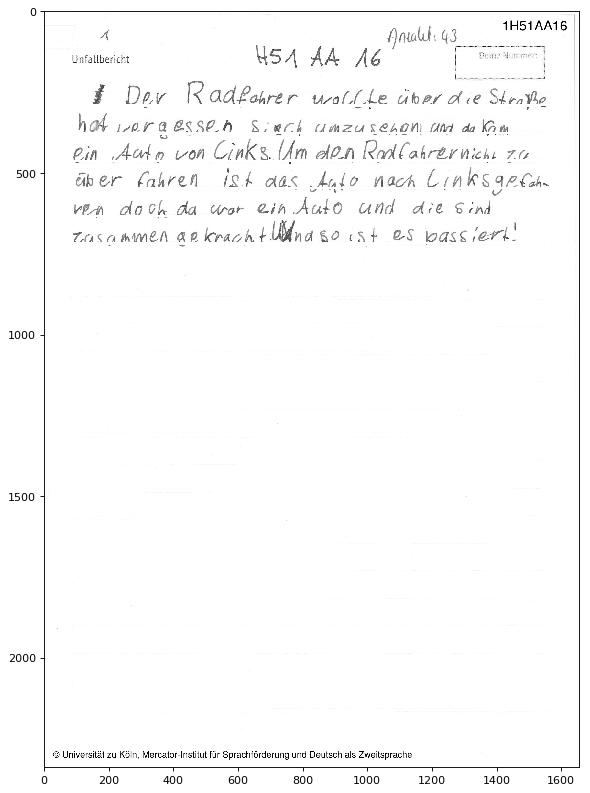

loaded


In [4]:
source_dir = os.path.abspath("../../data/")
image_2_orig = cv2.imread(source_dir+'/example_text_2.png')

result = remove_lines(image_2_orig)
display_image(result, "gray")

In [143]:
image_2 = cv2.cvtColor(image_2_orig, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(image_2)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)

#step0: get horizontal lines
horizontal = th2
rows,cols = horizontal.shape

horizontalsize = int(cols / 15)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,3))
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

kernel = np.ones((5,5), dtype = "uint8")
horizontal = cv2.dilate(horizontal, kernel)

True

In [144]:
#step1: identify line edges
edges = cv2.adaptiveThreshold(horizontal,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)

#step2: strengthen line size
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)

# step3: blur original horiz. lines
smooth = horizontal.copy()
smooth = cv2.blur(smooth, (20,20))

#step 5
(rows, cols) = np.where(img == 255)
horizontal[rows, cols] = smooth[rows, cols]

True

In [146]:
threshold= set(range(80,256))
for i, array in enumerate(horizontal):
    for j, element in enumerate(array):
        if element in threshold:
            image_2[i, j] = 255
            

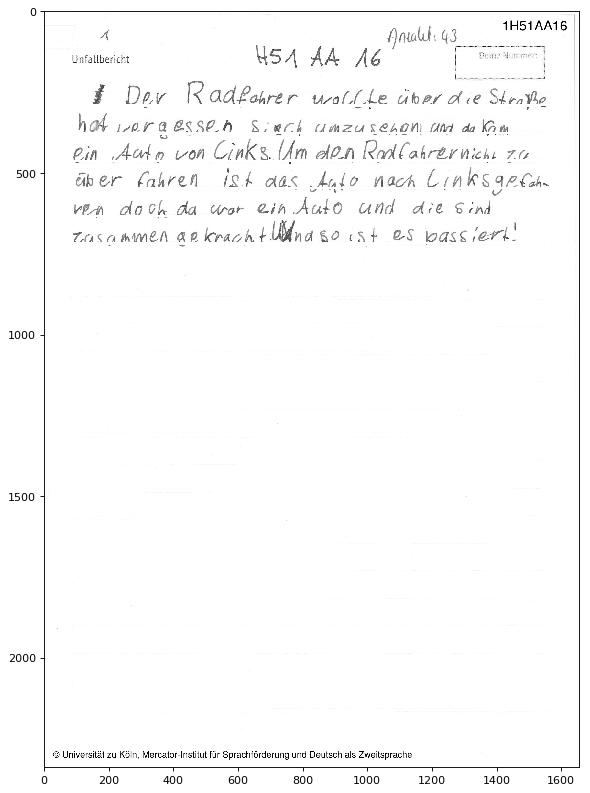

loaded


In [147]:
display_image(image_2, "gray")